In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Import r2_score to evaluate the model
from sklearn.metrics import r2_score

import scipy.stats as stats

In [5]:
file = pd.read_csv('day.csv')

In [6]:
file.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
file.shape

(730, 16)

In [9]:
file.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [28]:
##  Convert the 'dteday' Column to Date Format
file['dteday'] = pd.to_datetime(file['dteday'], format='%d-%m-%Y')

In [29]:
## Convert Columns to Categorical
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
file[categorical_cols] = file[categorical_cols].astype('category')

In [57]:

file.columns = file.columns.str.strip()
print(file.columns)
print(file.dtypes)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [32]:
# Check for missing values
file.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
###  PERFORMING EDA
# Get summary statistics
summary_statistics = file.describe()
print(summary_statistics)

          instant        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000   20.319259   23.726322   62.765175   12.763620   
std    210.877136    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%    183.250000   13.811885   16.889713   52.000000    9.041650   
50%    365.500000   20.465826   24.368225   62.625000   12.125325   
75%    547.750000   26.880615   30.445775   72.989575   15.625589   
max    730.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
ma

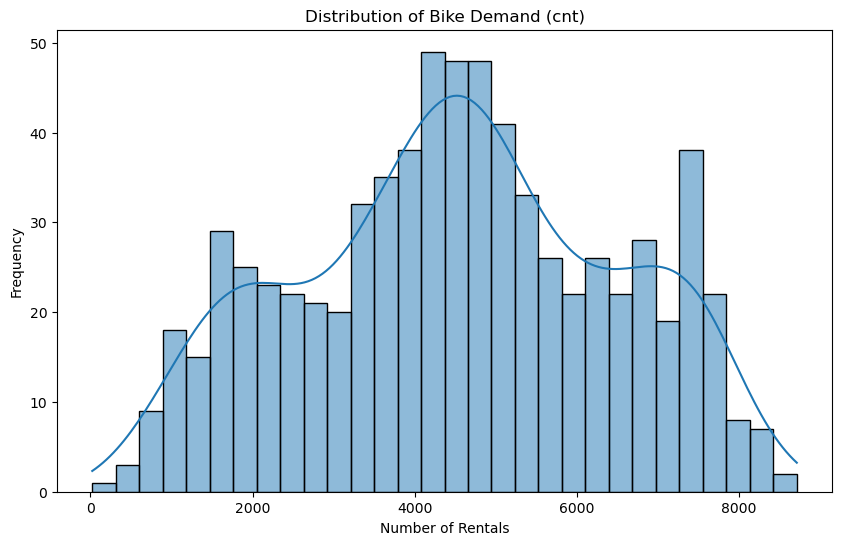

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(file['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Demand (cnt)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

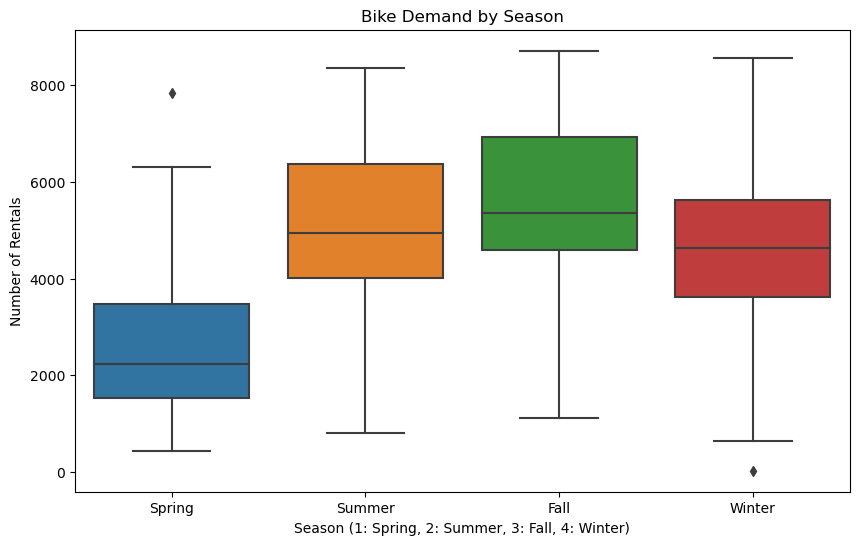

In [59]:
# Box Plot of Bike Demand by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x=file['season'], y=file['cnt'])  
plt.title('Bike Demand by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Number of Rentals')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter']) 
plt.show()

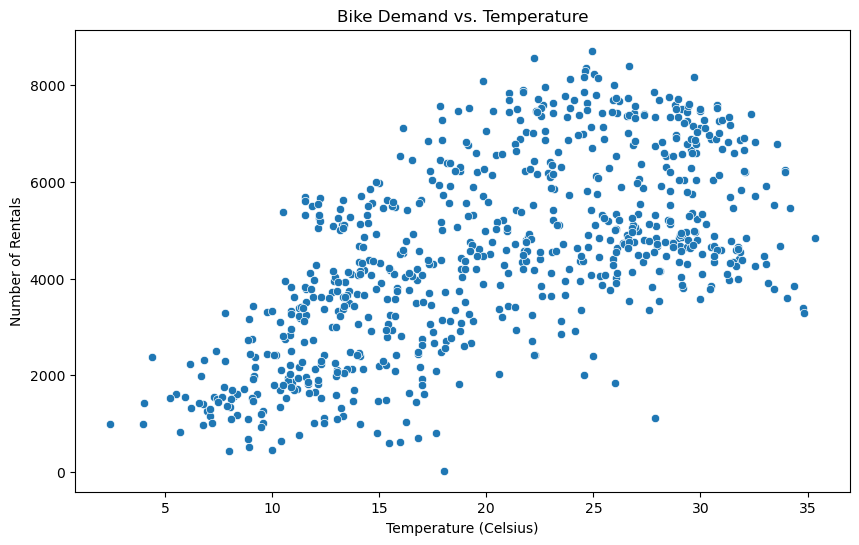

In [60]:
# Scatter Plot of Bike Demand vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=file['temp'], y=file['cnt']) 
plt.title('Bike Demand vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Rentals')
plt.show()

In [61]:
# Convert categorical variables into dummy variables
file_encoded = pd.get_dummies(file, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], drop_first=True)

In [62]:
# Define the features (X) and target variable (y)
X = file_encoded.drop(['instant', 'dteday', 'cnt', 'casual', 'registered'], axis=1)  # Dropping unnecessary columns
y = file_encoded['cnt']

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Make predictions on the test set
y_pred = model.predict(X_test)


# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)

R-squared score: 0.8622197210942302


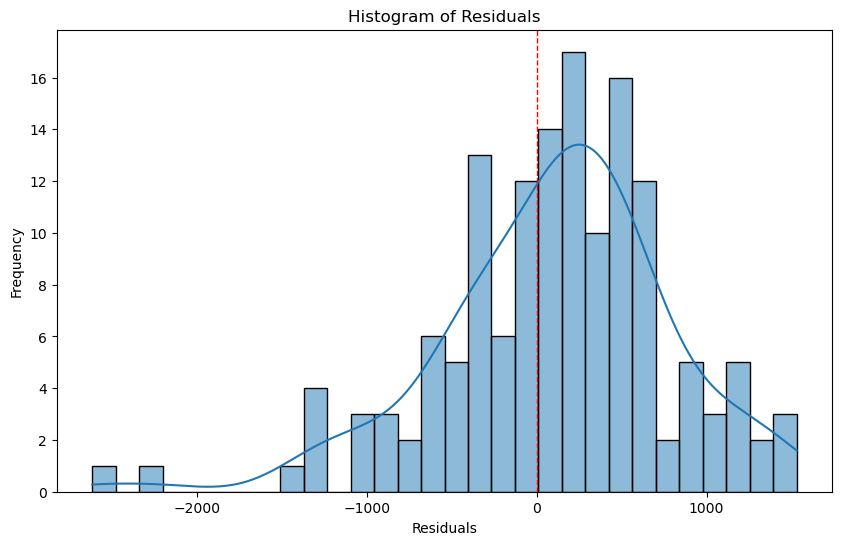

In [74]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at 0
plt.show()

In [ ]:
## A peak slightly to the right of 0 suggests that, on average,
## your model may be underestimating the bike demand. This means that the predicted values are slightly 
## lower than the actual values for some observations.

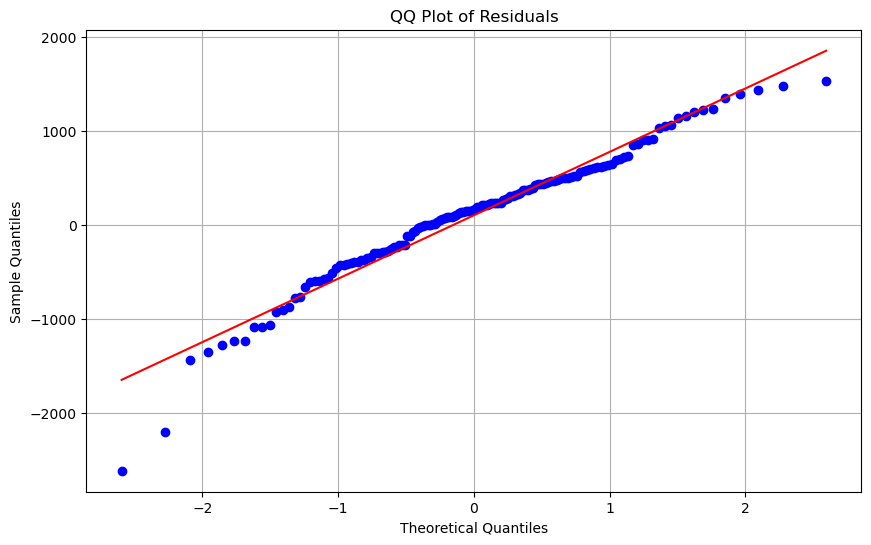

In [73]:
# Calculate residuals for the test set
residuals = y_test - y_pred  # Ensure y_test corresponds to y_pred

# Create QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

In [ ]:
## The points in the QQ plot fall approximately along a straight line (especially along the 45-degree line),
## it indicates that the residuals are normally distributed.

## The points deviate significantly from the line, especially in the tails, it suggests that the residuals
## are not normally distributed. This could indicate issues with the model fit.